# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [3]:
from core.reports import *
from core.visualization import *
from core.metrics import evaluate_model
from core.model import AdvancedLinearRegression

# Загрузка и первичный анализ данных

In [4]:
data_path = 'data/dataset.csv'

In [5]:
songs = pd.read_csv(data_path, index_col=0)
songs.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
58720,6xax7ldwP2060XaEpzuMOu,Faderhead,FH-X,"No Gods, No Flags, No Bullshit",21,279705,True,0.589,0.9210,9,-7.441,1,0.0592,0.00019,0.000005,0.2090,0.193,120.020,4,industrial
81539,2yNKDG4FgwzQuL0JUEOunR,Billie Eilish,Herbststimmung,bad guy,1,194087,False,0.701,0.4250,7,-10.965,1,0.3750,0.32800,0.130000,0.1000,0.562,135.128,4,pop
95621,7GFPrxqvJO7NL2Yi4hc7Qv,Porfi Baloa,Punto Y Seguimos,Asi Lo Quiso,28,202209,False,0.631,0.8240,0,-3.852,0,0.0358,0.52100,0.000000,0.0744,0.905,168.118,4,salsa
59690,1Hm359hrqN0bRPUdwS0P21,Alireza Mashayekhi;Djamchid Chemirani;Keyvan C...,Sheherazade,Zendani,0,101800,False,0.542,0.0974,9,-30.880,1,0.2980,0.92900,0.000736,0.1100,0.432,83.478,5,iranian
74100,2ln8TMs7T1zEctVoifIXjj,Clarice Falcão,Problema Meu,Vinheta,45,78184,False,0.519,0.6850,9,-7.171,1,0.0955,0.37300,0.000000,0.0629,0.745,115.929,4,mpb
100838,1nDeAmeyuZhZRLlCcOHRHu,Torsson,Lingonplockning,Blodomloppet,33,134333,False,0.759,0.7050,5,-11.534,1,0.0336,0.31400,0.000353,0.2530,0.982,136.348,4,ska
78356,0EiUpsNMBVX4eWczcM6DA6,DJ Robin;Schürze,Ballermann Hits 2022,Layla,30,185437,False,0.442,0.9220,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4,party
51630,7LMWOSOTxSMxABmkpG2YK3,Ty Dolla $ign;Post Malone,New Rap Icons,Spicy,0,143375,False,0.785,0.5230,7,-5.853,1,0.0489,0.14400,0.000000,0.1170,0.134,100.002,4,hip-hop
8402,3XKIUb7HzIF1Vu9usunMzc,Santana;The Product G&B,Supernatural (Remastered),Maria Maria (feat. The Product G&B),67,261973,False,0.777,0.6010,2,-5.931,1,0.1260,0.04060,0.002010,0.0348,0.680,97.911,4,blues
14137,4mXSbKYf6voPyMaFc79CwL,Kidz Bop Kids,KIDZ BOP Halloween,Purple People Eater,44,151093,False,0.562,0.8580,9,-3.724,1,0.0865,0.04940,0.000000,0.1610,0.807,158.070,4,children


Удалим дублирующиеся треки

In [6]:
songs.drop_duplicates(inplace=True)

Посмотрим на статистики треков Эминема

In [7]:
eminem = songs[songs.artists.str.contains('Eminem', na=False)]
eminem

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20413,2kQuhkFX7uSVepCD3h29g5,Akon;Eminem,Konvicted,Smack That,81,212360,True,0.939,0.742,5,-5.171,0,0.0467,0.32100,0.000000,0.1070,0.9240,118.978,4,dance
37220,7iXF2W9vKmDoGAhlHdpyIa,Dr. Dre;Eminem,2001,Forgot About Dre,80,222293,True,0.924,0.740,8,-1.299,1,0.0774,0.08270,0.000000,0.1630,0.6210,133.974,4,funk
37251,70ATm56tH7OrQ1zurYssz0,Dr. Dre;Eminem;Skylar Grey,I Need A Doctor,I Need A Doctor,72,283733,True,0.594,0.946,3,-4.521,1,0.4520,0.08690,0.000000,0.3060,0.3970,155.826,4,funk
37302,3a2jFwnts4Cf0OwJbK61SL,Dr. Dre;Eminem,Gospel (with Eminem),Gospel (with Eminem),70,210027,True,0.919,0.869,1,-4.441,1,0.2320,0.10300,0.000012,0.1660,0.6550,117.030,4,funk
37355,1SWVDBtw6h3tm9OehOkDhv,Dr. Dre;Eminem;Xzibit,2001,What's The Difference,75,244200,True,0.772,0.821,11,-0.140,0,0.2500,0.22300,0.000000,0.1480,0.7700,91.921,4,funk
48068,04w57GO5p1763E44KQ8AKB,Xzibit;Eminem;Nate Dogg,Man VS Machine,My Name (feat. Eminem & Nate Dogg),62,272506,False,0.842,0.738,11,-5.114,0,0.2190,0.15900,0.000057,0.0917,0.5970,85.873,4,hardcore
48117,6LZe8JfVaqcpq8yjkHtWQe,"Royce Da 5'9"";Eminem;King Green",Book of Ryan (Bonus Track Edition),Caterpillar (feat. Eminem & King Green),57,283076,True,0.706,0.745,10,-5.970,0,0.4410,0.13600,0.000000,0.2680,0.5980,91.080,4,hardcore
48163,4bRPecD9suGW8CfNZhzjS1,Nas;Eminem;EPMD,King's Disease II,EPMD 2 (feat. Eminem & EPMD),56,214434,True,0.689,0.830,10,-4.047,0,0.3020,0.12100,0.000000,0.3180,0.7030,94.566,4,hardcore
48200,6SMrWEWukd0DWh5iHGWgks,The Notorious B.I.G.;Eminem,Greatest Hits,Dead Wrong (feat. Eminem) - 2007 Remaster,55,297226,True,0.648,0.895,10,-3.187,1,0.2800,0.19500,0.001320,0.0335,0.8170,82.122,4,hardcore
48359,6s4kWgzQwsueo3mfllY1s6,The Notorious B.I.G.;Eminem,Born Again,Dead Wrong (feat. Eminem) - 2005 Remaster,57,297426,True,0.682,0.920,10,-1.544,1,0.2780,0.17700,0.001580,0.0443,0.8350,82.228,4,hardcore


Отсортируем их по популярности

In [8]:
eminem.sort_values(by=['popularity'], ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
51159,7lQ8MOhq6IN2w8EYcFNSUk,Eminem,The Eminem Show,Without Me,88,290320,True,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,4,hip-hop
51216,3yfqSUWxFvZELEM4PmlwIR,Eminem,The Marshall Mathers LP,The Real Slim Shady,87,284200,True,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,4,hip-hop
51503,4woTEX1wYOTGDqNXuavlRC,Eminem;Dina Rae,The Eminem Show,Superman,86,350320,True,0.802,0.755,4,-3.138,0,0.0564,0.02150,0.000000,0.2950,0.5800,130.027,4,hip-hop
51277,4xkOaSrkexMciUUogZKVTS,Eminem;Nate Dogg,The Eminem Show,Till I Collapse,86,297786,True,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,4,hip-hop
51301,3UmaczJpikHgJFyBTAJVoz,Eminem;Dido,The Marshall Mathers LP,Stan,85,404106,True,0.780,0.768,6,-4.325,0,0.2380,0.03710,0.000002,0.5180,0.5070,80.063,4,hip-hop
51401,15JINEqzVMv3SvJTAXAKED,Eminem;Rihanna,Recovery,Love The Way You Lie,83,263373,True,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.6410,86.989,4,hip-hop
51320,7FIWs0pqAYbP91WWM0vlTQ,Eminem;Juice WRLD,Music To Be Murdered By,Godzilla (feat. Juice WRLD),83,210800,True,0.808,0.745,10,-5.260,0,0.3420,0.14500,0.000000,0.2920,0.8290,165.995,4,hip-hop
51369,7Ie9W94M7OjPoZVV216Xus,Eminem,Recovery,Not Afraid,81,248133,True,0.855,0.954,0,-1.190,0,0.2640,0.52900,0.000000,0.2050,0.6680,114.635,5,hip-hop
20413,2kQuhkFX7uSVepCD3h29g5,Akon;Eminem,Konvicted,Smack That,81,212360,True,0.939,0.742,5,-5.171,0,0.0467,0.32100,0.000000,0.1070,0.9240,118.978,4,dance
37220,7iXF2W9vKmDoGAhlHdpyIa,Dr. Dre;Eminem,2001,Forgot About Dre,80,222293,True,0.924,0.740,8,-1.299,1,0.0774,0.08270,0.000000,0.1630,0.6210,133.974,4,funk


Посмотрим на типы данных в датасете, выделим категориальные переменные

In [9]:
songs.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Сделаем жанр трека категорией

In [10]:
songs.track_genre = songs.track_genre.astype('category')

Выделим числовые переменные

In [11]:
numeric_columns = [column for column in songs.columns if (songs[column].dtype == np.float64 or songs[column].dtype == np.int64)]
numeric_columns

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

Установим порог по уникальным значениям для переменной - если количество уникальных значений в числовой переменной ниже заданного порога, то такую переменную будем считать категориальной

In [12]:
discrete_columns_threshold = 15

In [13]:
discrete_columns = [column for column in numeric_columns if songs[column].nunique() < discrete_columns_threshold]
discrete_columns

['key', 'mode', 'time_signature']

Для первичного анализа заменим значения выделенных категориальных переменных с чисел на более ориентированные относительно предметной области

In [14]:
songs['mode'].replace({0: 'minor', 1: 'major'}, inplace=True)
songs.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4383,06C07UFuGEy7eNdOOITLhK,Flower Face,Pisces Moon (Alternate Version),Pisces Moon,23,219004,False,0.525,0.411,1,-8.829,major,0.0261,0.671000,0.000338,0.0989,0.1970,138.112,3,ambient
62566,1JLi1LOHt6dDTiMrwejsd1,GReeeeN,愛し君へ,愛し君へ,38,257853,False,0.499,0.823,9,-2.909,major,0.0551,0.226000,0.000000,0.3690,0.5480,158.124,4,j-pop
5475,6YtbrzaDmBCiBbMV3Rf61J,Rustage;GameboyJones;Tokumei;Rockit Music;Conn...,Akatsuki,Akatsuki,41,354471,True,0.798,0.705,1,-6.396,major,0.3700,0.397000,0.000000,0.0994,0.4570,167.934,4,anime
1867,04fpUM7YWaU5EQEohGpw4y,Voilaaa;Rama Traore,Voiciii,Tu Mens Devant Moi,17,247255,False,0.817,0.601,7,-11.881,minor,0.0424,0.068500,0.006660,0.0719,0.8470,129.971,4,afrobeat
60130,1RFVSRsECl5ICIUNjV4sEO,Rygin King,Therapy,Song Cry,27,177585,False,0.781,0.558,5,-7.461,major,0.1700,0.308000,0.000000,0.4500,0.5820,88.001,4,j-dance
59400,0NggnKLa7YMlISb2Ywq5FO,Crows in the Rain,They Sing Sagas of My Death (Live),They Sing Sagas of My Death,13,560093,False,0.135,0.462,9,-10.897,minor,0.0367,0.016200,0.916000,0.1900,0.0505,77.291,4,iranian
77366,55CoMnQ1b9o0uk6CjkxO03,RDN,"RDN Ao Vivo, Vol. 1",Nosso Lance - Ao Vivo,47,93194,False,0.562,0.777,2,-7.929,major,0.0543,0.330000,0.000000,0.7590,0.8610,174.064,4,pagode
105128,6fZgKfjI7TSVrjm3LPYnWB,´Goule,Electro Lofi,Electro Lofi,44,115200,False,0.662,0.365,7,-13.033,major,0.0762,0.606000,0.839000,0.7560,0.1840,74.995,4,study
22928,57QCT8L3kFQiN4AXkBRJxW,Dimmu Borgir,Spiritual Black Dimensions,The Blazing Monoliths of Defiance,22,277093,False,0.169,0.949,4,-6.789,minor,0.1010,0.000025,0.000743,0.2760,0.1120,112.758,4,death-metal
66126,5SRrwyXYwNscEbt3rt8sLm,Mixx Master Lee,The Mississippi Cha Cha Slide A.K.A. STOMP 2007,Featuring Mixx Master Lee & Red Rum (Blues Sho...,18,270786,False,0.897,0.761,0,-6.387,major,0.0826,0.079500,0.000000,0.0926,0.8150,114.001,4,kids


In [15]:
songs['key'].replace({0: 'C', 
                      1: 'C-sharp_D-flat', 
                      2: 'D', 
                      3: 'D-sharp_E-flat', 
                      4: 'E', 
                      5: 'F', 
                      6: 'F-sharp_G-flat', 
                      7: 'G', 
                      8: 'G-sharp_A-flat', 
                      9: 'A', 
                      10: 'A-sharp_B-flat', 
                      11: 'B'},
                     inplace=True)
songs.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
72413,7siSMBw1wFPPBNoBtXNzMb,Lamb of God,Resolution,Desolation,44,234306,True,0.434,0.9970,C-sharp_D-flat,-2.891,major,0.1720,0.000021,0.007110,0.4280,0.0676,137.936,4,metalcore
6889,532CXZ5NJFjhyQaRJkM86u,Primordial,Spirit The Earth Aflame,Gods To The Godless,16,467440,False,0.198,0.9560,G,-5.339,major,0.0640,0.000005,0.621000,0.1690,0.2160,114.183,4,black-metal
36099,31weWETfEZxvFORVi9o25F,Georges Bizet;Francesco Verzillo;Danilo Dellep...,"Chrétien, Cohen, Rousseau, Berlioz, Barthe, Th...","Carmen: ""Danse des gitans""",0,187520,False,0.594,0.0852,G,-20.606,major,0.0533,0.994000,0.937000,0.1010,0.6260,127.091,4,french
67524,7s1KiBsH0lCggKO52Qir6X,Chris Jedi;Joey Montana,Del gusto de hermanos,Dale Hasta Abajo,0,211560,False,0.686,0.9150,A-sharp_B-flat,-2.756,minor,0.0449,0.079000,0.000275,0.1070,0.7430,100.003,4,latin
10329,2mNugadSiU49kC0YlhSkyX,Rennie Pilgrem;BLIM;MC Chickaboo,The Best of Rennie Pilgrem,2 Freaks - Original,15,489520,False,0.718,0.9080,C-sharp_D-flat,-10.216,major,0.0440,0.000920,0.892000,0.1140,0.7170,131.903,4,breakbeat
8475,1a2iF9XymafjRk56q7oCxo,Stevie Ray Vaughan,Texas Flood (Legacy Edition),Pride and Joy,67,219586,False,0.427,0.6260,G-sharp_A-flat,-11.821,major,0.0385,0.027400,0.003950,0.1060,0.7430,126.877,4,blues
14163,5E8kvFy2sxqwHM7NABU20E,CoComelon,CoComelon Hobbies and Activities,Nap Time Song,54,178393,False,0.683,0.2070,C,-7.054,major,0.0281,0.890000,0.000000,0.1570,0.5380,110.067,3,children
22147,7ofAy5giZlztBAX4BX9jLB,Burgerkill,Beyond Coma and Despair,Darah Hitam Kebencian,29,387493,True,0.491,0.9730,G,-5.693,major,0.1620,0.000103,0.195000,0.0696,0.0351,119.982,4,death-metal
45255,05QEiRtbs57De7NxgUNOHp,Guus Dielissen,As It Was (Acoustic Instrumental),As It Was - Acoustic Instrumental,41,139612,False,0.287,0.2450,B,-20.674,minor,0.0493,0.915000,0.836000,0.1120,0.6240,84.056,4,guitar
38809,4Do8zB8wXpDEn0lBKg3Rf0,The Growlers,Chinese Fountain,Big Toe,55,151719,False,0.510,0.7660,E,-5.814,minor,0.0279,0.009430,0.000031,0.0679,0.7290,132.162,4,garage


В описании набора данных сказано, что значения time_signature должны находиться в промежутке от 3 до 7, поэтому удалим те треки, для которых time_signature лежит вне указанного диапазона

In [16]:
songs = songs.loc[(songs.time_signature >= 3) & (songs.time_signature <= 7)]

Сделаем все выделенные дискретные переменные категориальными

In [17]:
for column in discrete_columns:
    songs[column] = songs[column].astype('category')
songs.dtypes

track_id              object
artists               object
album_name            object
track_name            object
popularity             int64
duration_ms            int64
explicit                bool
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature      category
track_genre         category
dtype: object

Отобразим 20 самых популярных треков в датасете

In [18]:
songs.sort_values(by=['popularity'], ascending=False).head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,D,-7.375,major,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,D,-7.375,major,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,D,-5.548,major,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,G,-3.673,minor,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,G,-3.673,minor,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,G,-5.329,minor,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggae
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,G,-5.329,minor,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,G,-5.329,minor,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,G,-5.329,minor,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latino
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,G,-3.673,minor,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance


Отобразим описательные статистики числовых переменных

In [19]:
songs.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,112420.000000,1.124200e+05,112420.000000,112420.000000,112420.000000,112420.000000,112420.000000,112420.000000,112420.000000,112420.000000,112420.000000
mean,33.354065,2.283259e+05,0.569069,0.644381,-8.184129,0.084432,0.311441,0.153714,0.213003,0.476091,122.466708
std,22.312924,1.050942e+05,0.171626,0.249180,4.927457,0.104365,0.330303,0.307303,0.189652,0.258530,29.626186
min,0.000000,0.000000e+00,0.051300,0.000020,-46.591000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000
25%,17.000000,1.746490e+05,0.458000,0.477000,-9.935000,0.035900,0.016600,0.000000,0.097900,0.262000,99.768000
50%,35.000000,2.132020e+05,0.582000,0.687000,-6.967000,0.049000,0.166000,0.000040,0.132000,0.466000,122.063500
75%,50.000000,2.617030e+05,0.695000,0.855000,-4.988000,0.084600,0.589000,0.045425,0.273000,0.684000,140.110250
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


Как видно, переменные сильно отличаются, так некоторые лежат в пределах от 0 до 1, а некоторые измеряются сотнями тысяч (duration_ms). Видны различия и по стандартному отклонению. Поэтому перед применением PCA необходимо провести стандартизацию переменных

Выделим числовые переменные для более подробного анализа

In [20]:
numeric_columns = [column for column in numeric_columns if column not in discrete_columns]
numeric_columns

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

Построим графики распределения числовых переменных

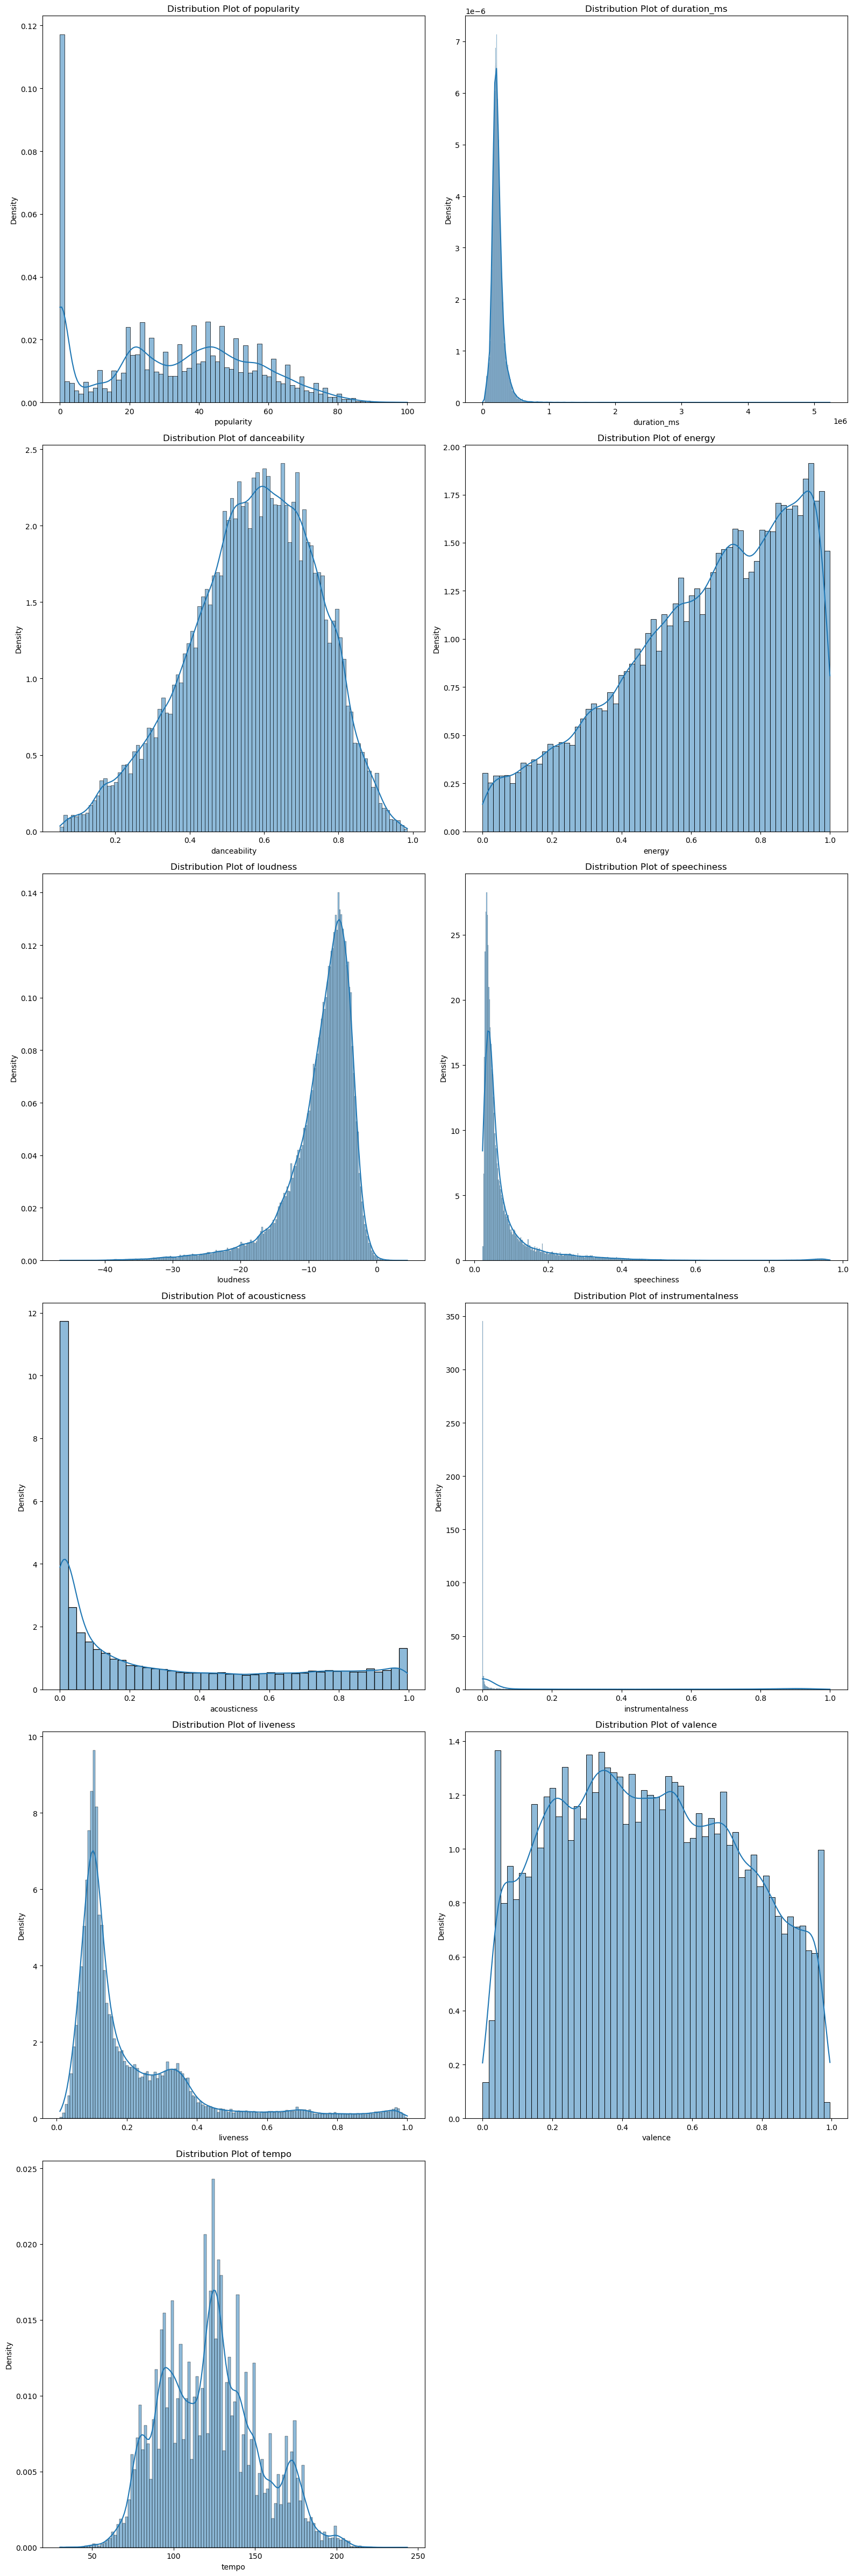

In [21]:
plot_numeric_columns_distributions(data=songs, columns=numeric_columns, plots_in_row=2, plot_width=8)

Посмотрим на взаимную корреляцию

In [22]:
correlations = songs[numeric_columns].corr()
correlations

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.009114,0.033539,-0.003701,0.047886,-0.044397,-0.020593,-0.095065,-0.005082,-0.042171,0.012141
duration_ms,-0.009114,1.000000,-0.080229,0.057533,-0.010087,-0.062780,-0.104112,0.131289,0.013250,-0.160339,0.021052
danceability,0.033539,-0.080229,1.000000,0.118610,0.240735,0.107060,-0.163945,-0.172725,-0.127520,0.469943,-0.076184
energy,-0.003701,0.057533,0.118610,1.000000,0.761299,0.141254,-0.733376,-0.174272,0.189666,0.252829,0.237434
loudness,0.047886,-0.010087,0.240735,0.761299,1.000000,0.060555,-0.587726,-0.427646,0.083114,0.270979,0.198842
speechiness,-0.044397,-0.062780,0.107060,0.141254,0.060555,1.000000,-0.004228,-0.086837,0.201054,0.035046,0.015497
acousticness,-0.020593,-0.104112,-0.163945,-0.733376,-0.587726,-0.004228,1.000000,0.098139,-0.022025,-0.101748,-0.204672
instrumentalness,-0.095065,0.131289,-0.172725,-0.174272,-0.427646,-0.086837,0.098139,1.000000,-0.084012,-0.319734,-0.040383
liveness,-0.005082,0.013250,-0.127520,0.189666,0.083114,0.201054,-0.022025,-0.084012,1.000000,0.023505,0.008552
valence,-0.042171,-0.160339,0.469943,0.252829,0.270979,0.035046,-0.101748,-0.319734,0.023505,1.000000,0.065859


И в виде тепловой карты

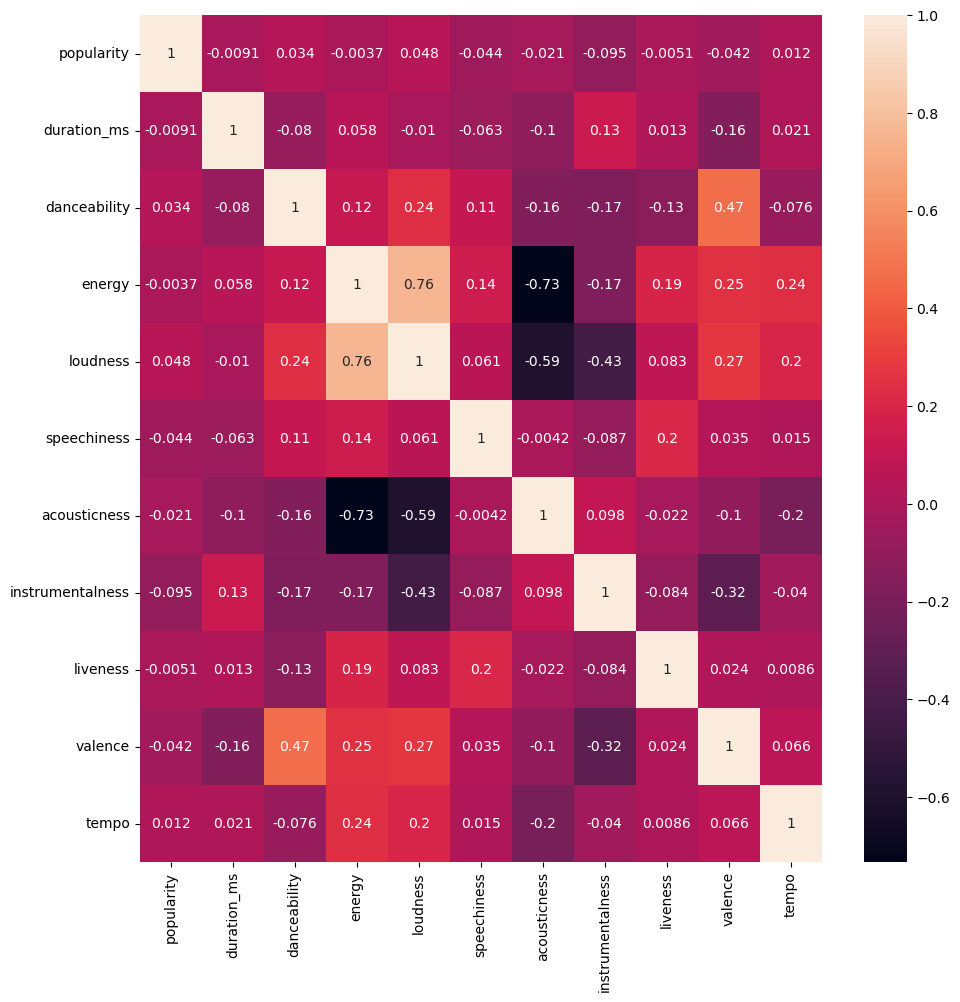

In [23]:
plt.subplots(figsize=(11, 11))
sns.heatmap(correlations, annot=True)
plt.show()

Сильных зависимостей (больше 0.8) не наблюдается, поэтому о мультиколлинеарности пока говорить не стоит, однако в дальнейшем исследовании возможно исключить одну из переменных *energy* или *acousticness*

Выделим категориальные переменные

In [24]:
categories = [column for column in songs.columns if songs[column].dtype in ['category', 'bool']]
categories

['explicit', 'key', 'mode', 'time_signature', 'track_genre']

Построим их гистограммы

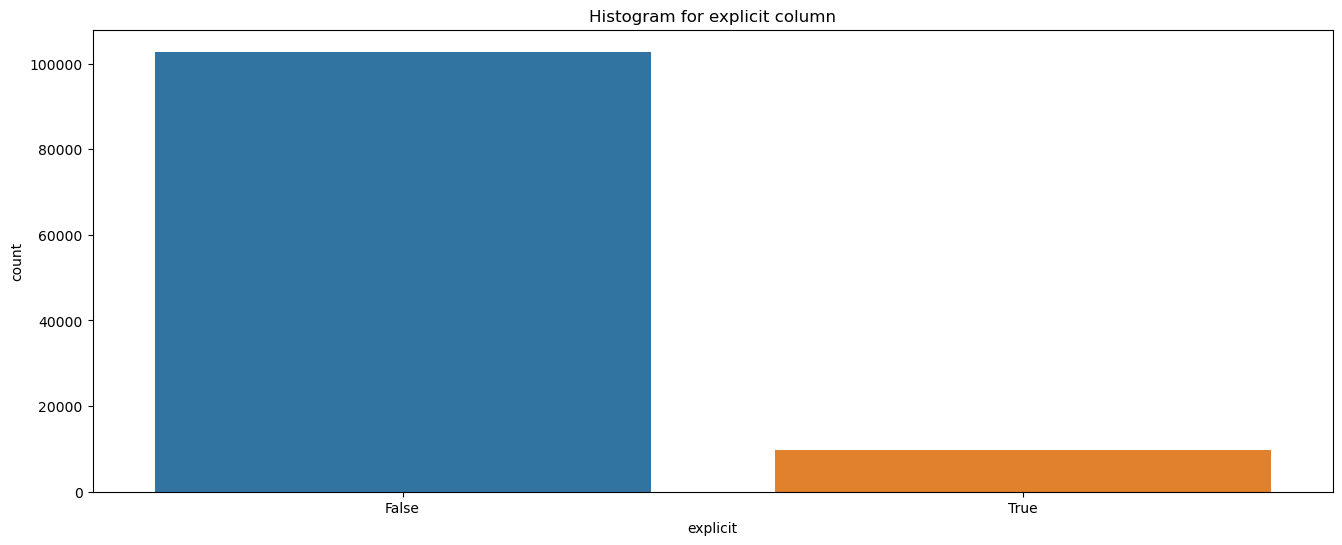

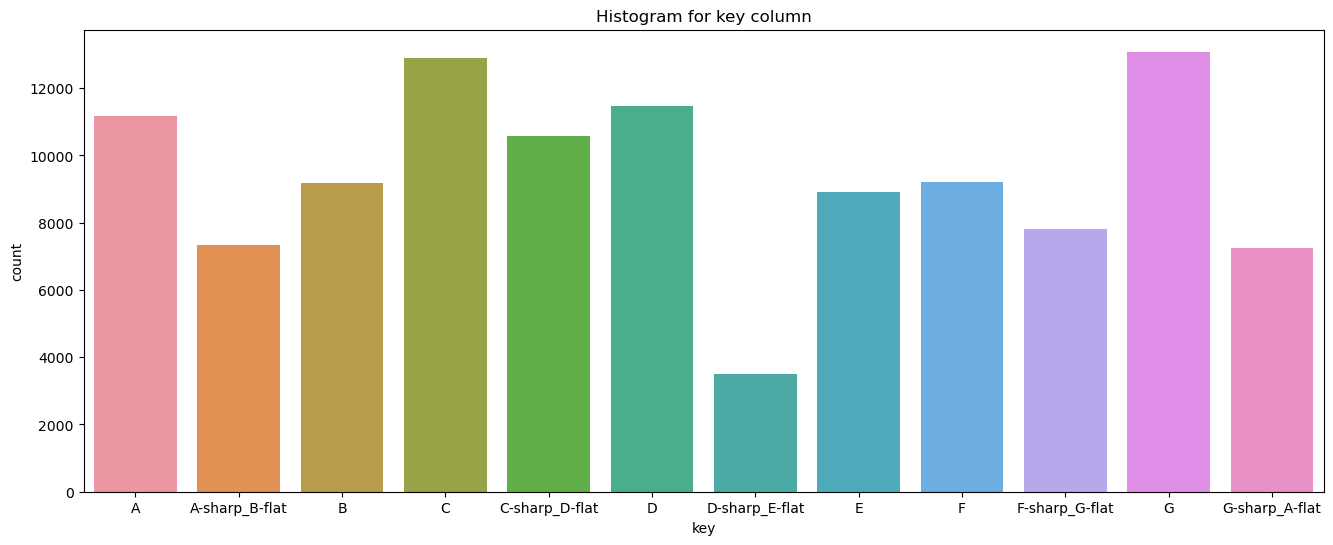

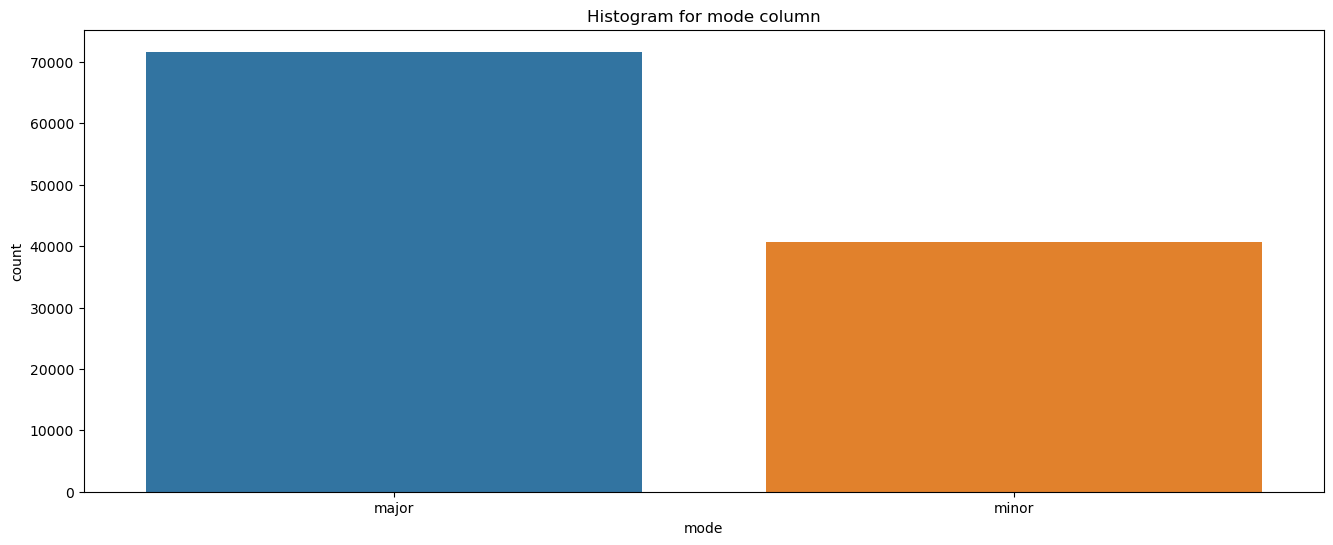

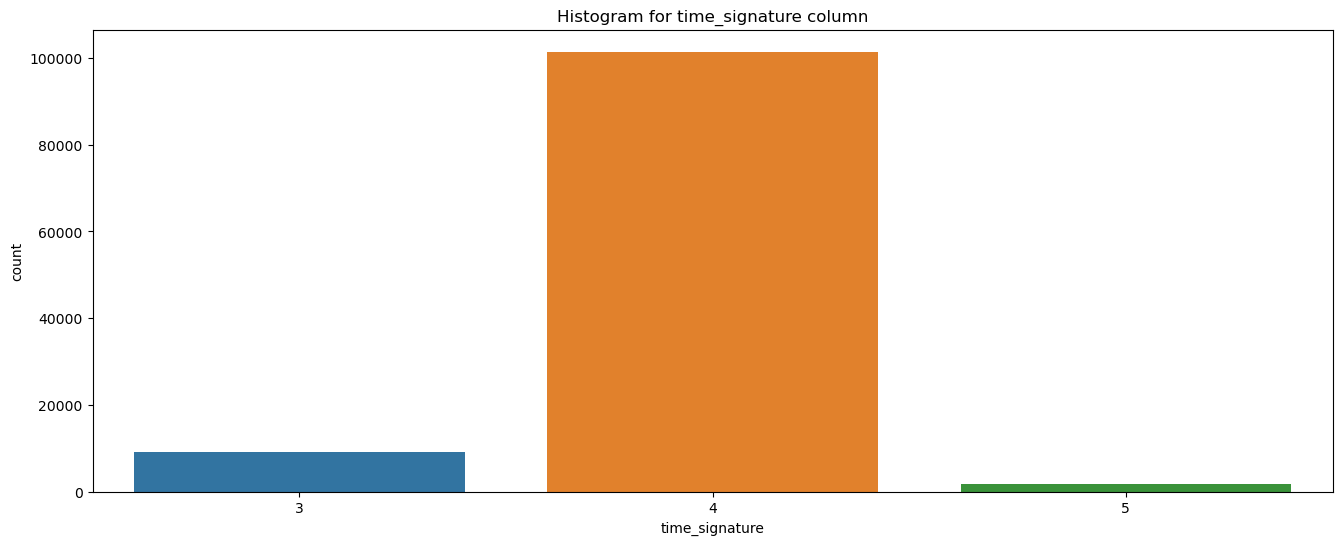

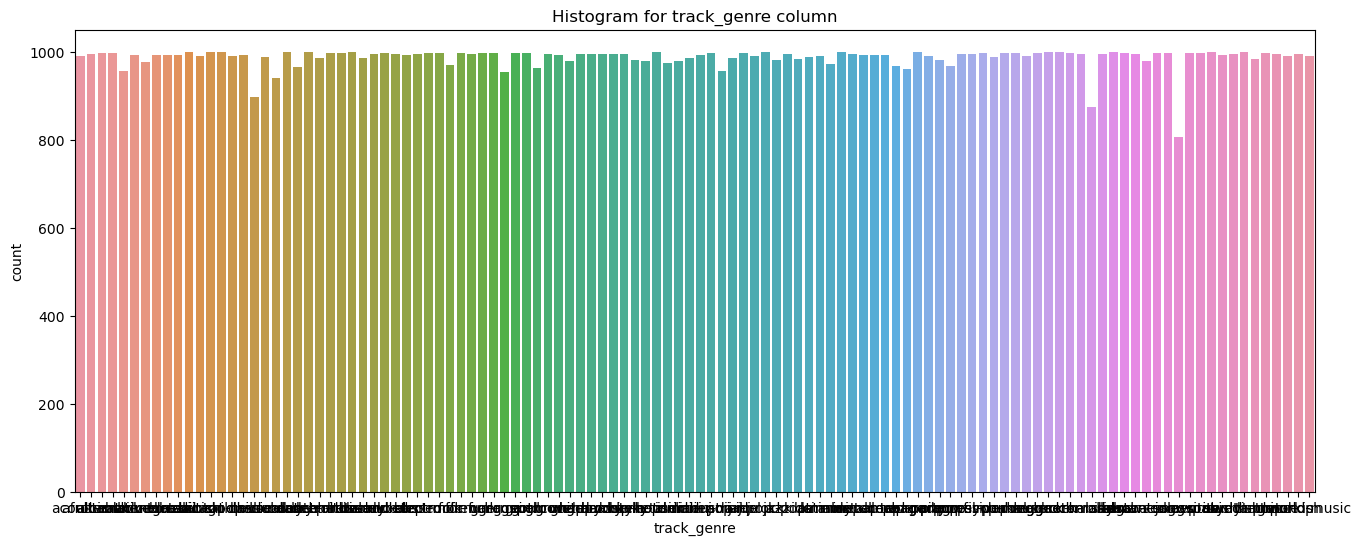

In [25]:
plot_categories_histograms(data=songs, columns=categories)

Теперь построим их зависимости с целевой переменной - популярностью

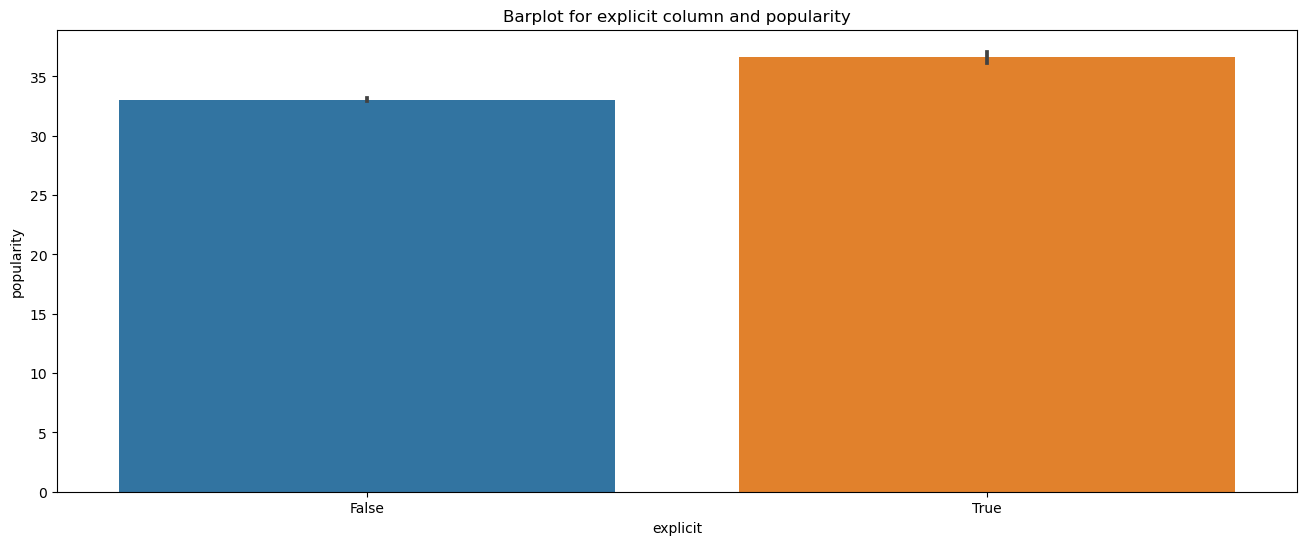

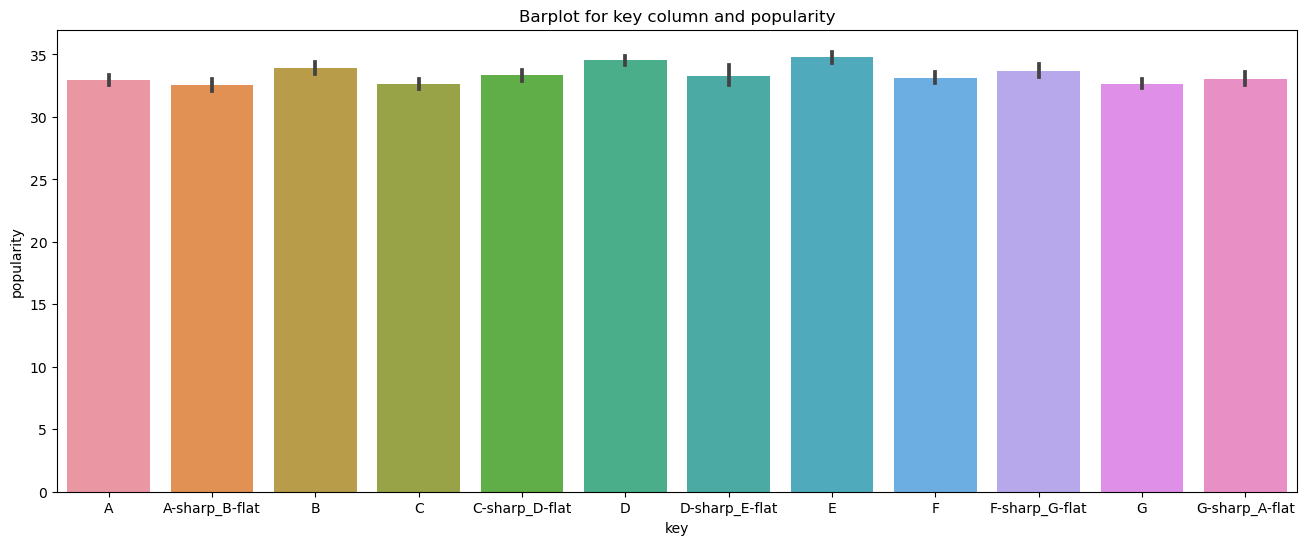

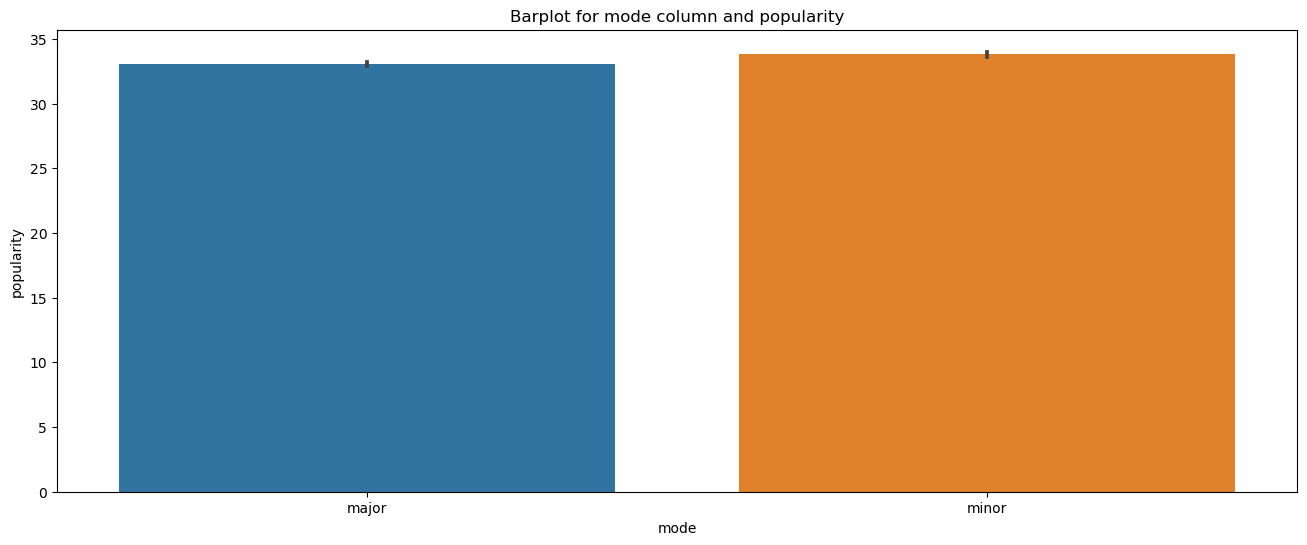

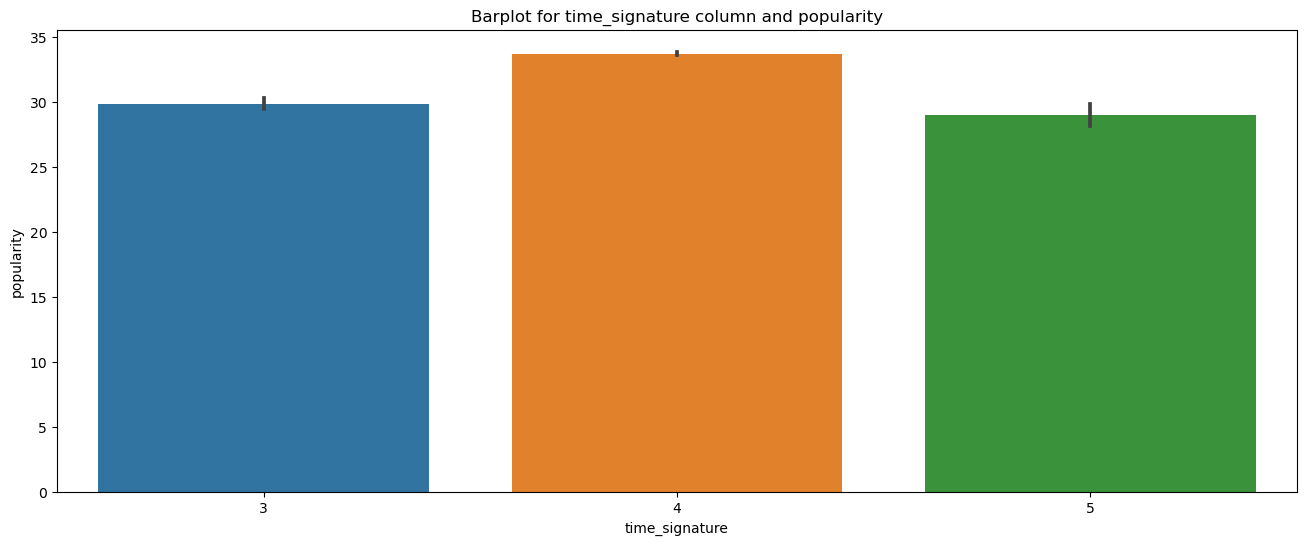

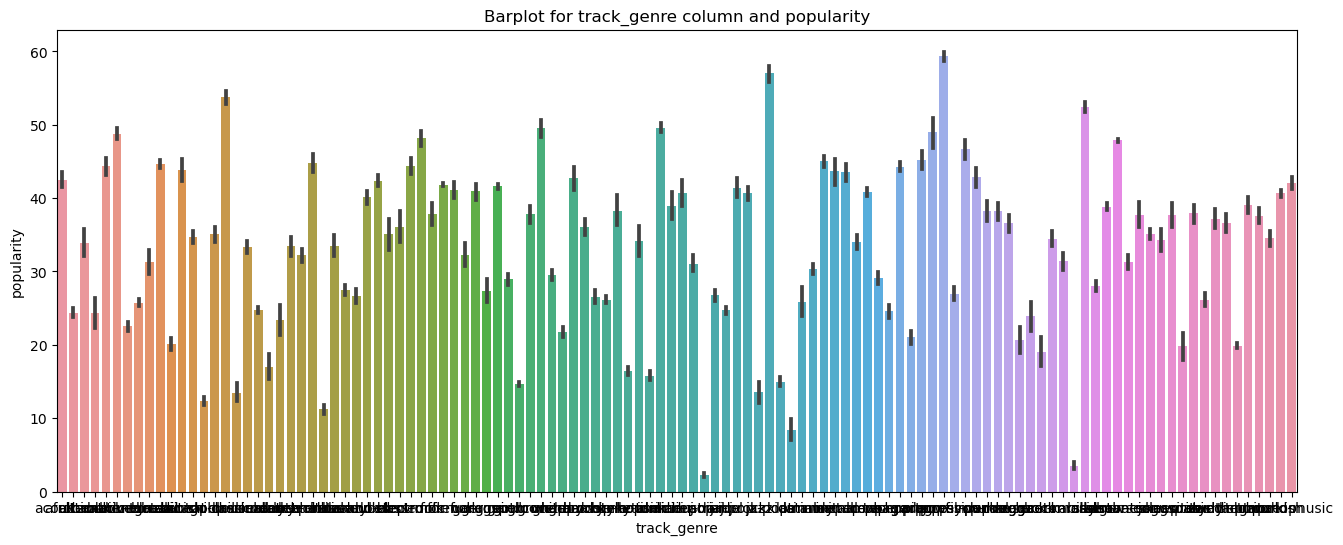

In [26]:
plot_categories_correlation_with_target(data=songs, columns=categories, target='popularity')

Рассмотрим немного подробнее популярность различных жанров

Посчитаем среднюю популярность треков по жанрам и отсортируем результат по убыванию (в верху окажутся самые популярные жанры) и отобразим 10 самых популярных жанров

In [27]:
track_genres = songs\
                .groupby("track_genre")\
                .agg(popularity = ('popularity', 'mean'))\
                .sort_values(by=['popularity'], ascending=False)
rank = track_genres.rank(ascending=False)
track_genres.insert(0, 'rank', rank)
track_genres.head(10)

,rank,popularity
track_genre,,
pop-film,1.0,59.348089
k-pop,2.0,56.988934
chill,3.0,53.727090
sad,4.0,52.433166
indian,5.0,49.611849
grunge,6.0,49.557905
pop,7.0,48.959669
anime,8.0,48.797379
emo,9.0,48.144578


Теперь отобразим 10 наименее популярных жанров

In [28]:
track_genres.tail(10)

,rank,popularity
track_genre,,
idm,105.0,15.798768
kids,106.0,14.921668
grindcore,107.0,14.647609
jazz,108.0,13.554536
classical,109.0,13.481027
chicago-house,110.0,12.333667
detroit-techno,111.0,11.188566
latin,112.0,8.379555
romance,113.0,3.526857


Выведем 10 самых популярных треков в жанре *pop-film* - самом популярном жанре датасета

In [29]:
pop_film_tracks = songs[songs.track_genre == 'pop-film'].sort_values(by=['popularity'], ascending=False)

In [30]:
pop_film_tracks.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80037,6TQS7URegxmcb8tTNpoXzi,Dhanush;Anirudh Ravichander,"Megham Karukatha (From ""Thiruchitrambalam"")","Megham Karukatha (From ""Thiruchitrambalam"")",80,290400,False,0.429,0.614,E,-6.573,minor,0.0709,0.5130,0.000316,0.0922,0.743,149.966,3,pop-film
80016,1Nr46gjiP50uPsz30gYhAd,Santhosh Narayanan;Anirudh Ravichander,"Thenmozhi (From ""Thiruchitrambalam"")","Thenmozhi (From ""Thiruchitrambalam"")",79,173225,False,0.764,0.532,A,-5.979,minor,0.0491,0.5980,0.000000,0.2600,0.859,123.950,4,pop-film
80047,3i7qScF9Oyp31O9bAutJez,A.R. Rahman;Madhushree,Vendhu Thanindhathu Kaadu (Original Motion Pic...,Mallipoo,79,245365,False,0.715,0.654,D,-7.266,major,0.3360,0.1960,0.000117,0.0667,0.762,175.589,3,pop-film
80042,1uJ2czshFLqimctgvsxfv2,A.R. Rahman;A. R. Reihana;Bamba Bakya,"Ponni Nadhi (From ""Ponniyin Selvan Part -1"") [...","Ponni Nadhi (From ""Ponniyin Selvan Part -1"") -...",77,290526,False,0.687,0.637,A-sharp_B-flat,-9.550,minor,0.1300,0.1200,0.000000,0.2910,0.560,152.000,4,pop-film
80043,5urYiIXu1ZhfMAOsp7WDTc,Yasser Desai;Neha Kakkar;Rajat Nagpal,"Dil Ko Karaar Aaya (From ""Sukoon"")","Dil Ko Karaar Aaya (From ""Sukoon"")",77,231486,False,0.550,0.448,B,-9.117,major,0.0366,0.7770,0.000459,0.1110,0.388,147.986,4,pop-film
80036,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",77,228855,False,0.603,0.573,C-sharp_D-flat,-5.843,major,0.0502,0.4780,0.000000,0.0971,0.236,82.941,4,pop-film
80026,2kOH2QZB7F7I1iVXqwKuBF,Dhanush;Anirudh Ravichander,"Mayakkama Kalakkama (From ""Thiruchitrambalam"")","Mayakkama Kalakkama (From ""Thiruchitrambalam"")",77,142258,False,0.789,0.536,A,-5.422,minor,0.0424,0.6040,0.000002,0.0880,0.877,124.029,4,pop-film
80011,2eTkxblLeqdTSsb2ivafDX,Ankit Tiwari;Manoj Muntashir,"Galliyan Returns (From ""Ek Villain Returns"")","Galliyan Returns (From ""Ek Villain Returns"")",77,350011,False,0.430,0.612,A-sharp_B-flat,-5.534,minor,0.0392,0.4320,0.000002,0.0955,0.241,85.959,4,pop-film
80040,1pean7zvZUqcWZaUucH63f,Dhanush;Anirudh Ravichander,"Thaai Kelavi (From ""Thiruchitrambalam"")","Thaai Kelavi (From ""Thiruchitrambalam"")",76,258909,False,0.661,0.920,A,-3.469,minor,0.1880,0.0352,0.000014,0.3140,0.494,82.508,4,pop-film
80012,0ojpEubhy4JNeVftmVuiN7,Armaan Malik;Vishal Mishra,Kabir Singh,Pehla Pyaar,76,272532,False,0.607,0.713,E,-5.105,major,0.0300,0.5600,0.000050,0.1010,0.611,124.868,4,pop-film


И 10 наименее популярных треков в жанре

In [31]:
pop_film_tracks.tail(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80337,73WZB1V5nD1Di5SL3IbZ08,Sonu Nigam,Devi Bhajan - Sonu Nigam,"Sawan Ki Rut Hai (From ""Meri Maa"")",4,431378,False,0.549,0.838,B,-6.707,minor,0.0642,0.688,0.000000,0.532,0.835,89.983,4,pop-film
80784,4ojMJV2wGlI0DFxx9xp3KE,Yasser Desai,Jashne Amade Rasool,Mere Dil Mein Hai Yaad,3,200681,False,0.482,0.142,D-sharp_E-flat,-12.820,major,0.0516,0.923,0.000000,0.136,0.456,114.709,3,pop-film
80343,3a49HDzR43WzzCHSsB064u,Sonu Nigam,Devi Bhajan - Sonu Nigam,"Maa Par Rakhna Vishwas (From ""Maa Ka Bulawa Aa...",3,388920,False,0.669,0.661,F,-6.434,minor,0.0472,0.679,0.000000,0.281,0.696,92.004,4,pop-film
80342,3xeZ5mBxmxuqO0XBAdQ8Ya,Sonu Nigam,Devi Bhajan - Sonu Nigam,"Patte Patte Mein Hai Basi Mahamaya (From ""Aa G...",3,351225,False,0.567,0.816,B,-4.025,minor,0.0480,0.789,0.000000,0.331,0.899,92.521,4,pop-film
80782,5PdzYnMEKbF6bImnBF7JI9,Yasser Desai,Jashne Amade Rasool,Mustafa Jaan-E-Rehmat,3,60126,False,0.409,0.231,C-sharp_D-flat,-10.846,minor,0.0332,0.976,0.000001,0.192,0.674,129.810,3,pop-film
80777,0DwMyswWZ2tAjZM84oRyBx,Yasser Desai,Jashne Amade Rasool,Zameen-O-Zaman,3,228469,False,0.340,0.121,F,-11.162,major,0.0352,0.877,0.000000,0.266,0.235,87.242,3,pop-film
80346,3Z3VzBHo8SdhPiglQcX72A,Sonu Nigam,Devi Bhajan - Sonu Nigam,"Ye Dwara Maa Ka Dwara (From ""Halwa Poori Baate...",3,427418,False,0.480,0.890,G,-4.567,major,0.0666,0.873,0.003120,0.257,0.860,80.212,4,pop-film
80783,3AyvTrhBMkZaL0qURiFI12,Yasser Desai,Jashne Amade Rasool,Mera Dil Badal De,2,194761,False,0.508,0.132,A-sharp_B-flat,-11.755,major,0.0331,0.894,0.000000,0.106,0.441,75.062,4,pop-film
80239,4BtzfRDLEl5aWtOp2SrNpO,Arijit Singh,25 Love Telugu Collection,"Nacchite Ye Panaina (From ""Dohchay"")",0,210619,False,0.654,0.713,C,-7.566,major,0.0533,0.222,0.000000,0.312,0.548,134.985,4,pop-film
80564,5iHOTwCpFRSdBfITAdBP3d,Rahat Fateh Ali Khan;Suzanne D'Mello;Mann Taneja,Rishte Naate (LO-FI Remix),Rishte Naate - LO-FI Remix,0,264892,False,0.569,0.750,B,-4.851,major,0.3350,0.688,0.000008,0.115,0.522,155.904,4,pop-film


Выведем 10 самых популярных треков в жанре *iranian* - наименее популярном жанре датасета

In [32]:
iranian_tracks = songs[songs.track_genre == 'iranian'].sort_values(by=['popularity'], ascending=False)
iranian_tracks.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
59150,1AN4ufCCVjezLyl6QBlFrq,Porya Hatami,Kani + Remixes,Kani (Day),33,537610,False,0.1010,0.10300,F,-20.407,major,0.0449,0.970000,0.930000,0.0922,0.0334,83.575,3,iranian
59103,26p4guqZWBNsBSLTifE1Dy,Porya Hatami,Phone to Logos,Pomegranates,32,447355,False,0.2210,0.10000,E,-24.182,major,0.0462,0.970000,0.740000,0.3610,0.0489,71.551,4,iranian
59000,2M4OCoJ5q4sYmItQ2YQcH8,Crows in the Rain,Dri:m Wan; Därk Blü,Dri:merz Path / Way,29,471041,False,0.3000,0.33800,C-sharp_D-flat,-8.869,minor,0.0320,0.008330,0.724000,0.1030,0.0595,140.112,3,iranian
59001,5lr9xsWCwPDtCsIkTGrk2H,Crows in the Rain,Sorrow for an Unfinished Dream,Now You Can Sleep,27,366619,False,0.4550,0.05620,C-sharp_D-flat,-25.557,minor,0.0420,0.977000,0.879000,0.0983,0.1150,130.036,4,iranian
59106,6yz2HojEuzMLx1yJoMYVSH,Confess,Eat What You Kill,Eat What You Kill,27,315789,True,0.4190,0.95000,D-sharp_E-flat,-4.410,minor,0.0847,0.000853,0.679000,0.1120,0.1050,95.065,4,iranian
59051,4fJHpKk5xORT4CitGQjDuj,Mahdyar;Hichkas,Bang (Remix),Bang (Remix),20,280838,False,0.4970,0.65400,G,-6.033,major,0.1320,0.006350,0.000073,0.1160,0.4130,160.469,4,iranian
59401,0BHRumGwcRNsQQVueMzOEM,Out of Nowhere,Dying Sun,Dying Sun,20,187058,False,0.4180,0.94200,B,-4.984,minor,0.1360,0.000026,0.003480,0.0664,0.3760,170.046,4,iranian
59007,6FApg0v1OKUELGZIhq507U,Alphaxone,The Infinite Void,Center X,19,81750,False,0.0566,0.23600,D-sharp_E-flat,-27.826,major,0.0622,0.169000,0.988000,0.0953,0.0303,206.139,5,iranian
59101,5UqiksDCnfm34lZqZSg4Xv,Crows in the Rain,Kyori,Kyori,17,490041,False,0.3930,0.16800,E,-18.882,minor,0.0359,0.988000,0.913000,0.0930,0.0398,60.071,4,iranian
59004,1U64F3FMsryebYlNRW94VO,Porya Hatami,Phone to Logos,Color Bars,16,62834,False,0.2000,0.00871,D-sharp_E-flat,-37.780,major,0.0515,0.996000,0.901000,0.1030,0.1060,69.984,4,iranian


И 10 наименее популярных треков в жанре

In [33]:
iranian_tracks.tail(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
59487,3sfeCFcPoMd0VzMG1n1pFc,Tegh,Emergent Errors,"I Think I'm Dead, I'd Like To Ask Your Opinion",0,218181,False,0.1950,0.3790,D,-15.678,major,0.0398,0.070700,0.657000,0.1100,0.0697,80.396,3,iranian
59488,2HKTVg3VL4LULPp7F8SUQa,Trivax,Sin,Death to the Empire of the World,0,230418,False,0.1330,0.9960,A-sharp_B-flat,-4.190,minor,0.1220,0.000002,0.914000,0.3250,0.1890,147.286,4,iranian
59489,5PDM8jaMO54UT4jJtgKPS4,Spuntic,Foundation,Lifeforms,0,190000,False,0.1590,0.0736,D-sharp_E-flat,-21.123,minor,0.0406,0.975000,0.975000,0.0854,0.0355,108.997,3,iranian
59490,5rI2GAOCM7RoZeJWshwB1r,Kiawasch Sahebnassagh,Schlaflied unter der Ruine(Lalai zir-e Avar) -...,Aufs Schlimmste zu:Fur 7 Posaunen und Sprechen...,0,186813,False,0.2880,0.0440,C-sharp_D-flat,-16.281,minor,0.0400,0.991000,0.391000,0.3440,0.0312,77.482,3,iranian
59491,06L37I0KAqeR67JopmPUf3,Alireza Mashayekhi;National Symphony Orchestra...,"Symphony, No. 4 (Zagros), Op. 103","Movement, No. 2",0,319738,False,0.1250,0.1240,A,-19.352,major,0.0489,0.968000,0.955000,0.0881,0.0273,67.481,4,iranian
59492,284goiTL3lg84LccoA5mAo,Alireza Mashayekhi;National Symphony Orchestra...,"Symphony, No. 4 (Zagros), Op. 103","Movement, No. 3",0,315715,False,0.0982,0.2550,C,-20.245,major,0.0435,0.862000,0.915000,0.3020,0.0376,82.459,5,iranian
59493,37pm3pWmcjRREFg5sTt1HN,Spuntic,Foundation,Outlying,0,303464,False,0.3530,0.5260,F-sharp_G-flat,-15.455,minor,0.0675,0.521000,0.416000,0.1080,0.1480,74.658,4,iranian
59494,0wnwNcNrTA7pkIVg7xpVvU,Spuntic,Foundation,Sleep and Waking,0,297612,False,0.0653,0.1030,C,-20.006,major,0.0383,0.979000,0.966000,0.0811,0.0352,73.618,5,iranian
59496,5FdxPzBukTqNWME80A8vLe,Kiawasch Sahebnassagh;Amirhosein Allah Yari,Forty Poems To Kharaghan,Rubai 34 To 39,0,418586,False,0.3470,0.1210,C,-18.072,minor,0.0400,0.855000,0.000061,0.1920,0.1820,83.672,4,iranian
59999,6i6I1aWvQyzsSsvxm4pGMA,Alireza Mashayekhi;Djamchid Chemirani;Keyvan C...,"Mashayekhi: Sheherazade ""Layla Ramezan Plays 1...",Sarab,0,212200,False,0.5230,0.1200,D,-30.758,minor,0.1230,0.895000,0.017300,0.1100,0.0780,135.216,5,iranian


Посмотрим, в каких жанрах писал треки Эминем

In [34]:
eminem_genres = eminem.track_genre.unique()
eminem_genres

array(['dance', 'funk', 'hardcore', 'hip-hop', 'piano', 'rock'],
      dtype=object)

Посмотрим, насколько популярны жанры, в которых писал треки Эминем 

In [35]:
track_genres.loc[eminem_genres]

,rank,popularity
track_genre,,
dance,94.0,23.403109
funk,67.0,32.250000
hardcore,52.0,36.102616
hip-hop,41.0,38.243878
piano,12.0,45.170408
rock,102.0,19.001000


Теперь преобразуем категориальные переменные в числовые представления и проанализируем корреляции - возможно их также стоит учесть при прогнозе популярности трека

In [36]:
songs_copy = songs.copy() # во избежание ненужных затираний данных

Для преобразования будем использовать LabelEncoder

In [37]:
encoder = LabelEncoder()
encoded_categories = songs_copy.select_dtypes(include=['category', 'bool'])\
                        .apply(encoder.fit_transform)
songs_copy[categories] = encoded_categories
songs_copy.sample(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
50463,5CtaBjZac81phlz5FNFI18,Accept,Blood of the Nations,Beat the Bastards,55,324746,0,0.523,0.9840,2,-3.695,1,0.1160,0.000019,0.017500,0.0553,0.3240,120.004,1,50
49521,65tjNM5AfgoXv4fK6hl57g,Coone;Ambassador Inc,The Challenge,Come Take My Hand - Original,22,291815,0,0.615,0.7310,5,-6.418,1,0.0526,0.006170,0.001630,0.0619,0.3610,149.999,1,49
3671,62qUTJAM7dZgOebu2qB7QB,Royal & the Serpent,Indie Chill Out,Overwhelmed,0,159293,0,0.804,0.3230,3,-11.127,1,0.3050,0.308000,0.000000,0.1500,0.4560,87.019,1,3
14933,6EoCM7tOxGc5TRhh8Gep5p,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),Crazy Train,0,287194,0,0.472,0.8030,0,-6.856,0,0.0441,0.044100,0.000019,0.4320,0.6640,137.389,1,14
99044,3CeodjvVasr0yFSBufbKsG,Stephen Sanchez,LUGNA LÅTAR,Until I Found You,3,177720,0,0.539,0.5080,1,-6.050,0,0.0288,0.727000,0.000000,0.1740,0.2270,101.358,0,99
11627,1BXAyGazbybUVNQ0VmGsdl,Jessie Ware,Free Yourself,Free Yourself,65,234493,0,0.688,0.9100,3,-4.496,1,0.0456,0.002860,0.000011,0.1290,0.7700,119.024,1,11
61919,1qKnTCLdSXjHxSwfld09yv,Keyakizaka46,真っ白なものは汚したくなる (Complete Edition),W-KEYAKIZAKAの詩,18,308293,0,0.633,0.9060,7,-4.121,0,0.0365,0.489000,0.000000,0.3320,0.8820,122.987,1,61
37840,57n605a9nDDzchHanKhP0u,Lucas Lucco,O Destino (Bonus Track Version),11 Vidas,45,189893,0,0.624,0.6220,10,-5.780,0,0.0300,0.804000,0.000000,0.1550,0.4570,140.021,1,37
27296,6J5NBcgV1SU1igwh19QvSr,Logistics,Fear Not,Over and Out,20,379038,0,0.402,0.9740,8,-3.478,1,0.0463,0.068100,0.922000,0.3890,0.0386,173.997,1,27
16994,6fj9Go9PJSp2Xt9pb7swGg,Wolfgang Amadeus Mozart;Danielle Laval,Mozart - All Day Classics,8 Variations on ‘Dieu d'amour’ from ‘Les maria...,7,96880,0,0.522,0.0141,8,-24.694,0,0.1040,0.996000,0.911000,0.0955,0.6420,163.216,1,16


Посмотрим на взаимную корреляцию

In [38]:
full_correlations = songs_copy.corr(numeric_only=True)
full_correlations

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
popularity,1.000000,-0.009114,0.044691,0.033539,-0.003701,0.002526,0.047886,0.015218,-0.044397,-0.020593,-0.095065,-0.005082,-0.042171,0.012141,0.031556,0.032633
duration_ms,-0.009114,1.000000,-0.067059,-0.080229,0.057533,0.000798,-0.010087,0.036447,-0.062780,-0.104112,0.131289,0.013250,-0.160339,0.021052,0.001527,-0.032978
explicit,0.044691,-0.067059,1.000000,0.121363,0.094987,0.004310,0.107699,0.037486,0.305099,-0.094182,-0.102098,0.031035,-0.005206,-0.004674,0.048420,-0.053269
danceability,0.033539,-0.080229,0.121363,1.000000,0.118610,0.001463,0.240735,0.070668,0.107060,-0.163945,-0.172725,-0.127520,0.469943,-0.076184,0.170289,0.009605
energy,-0.003701,0.057533,0.094987,0.118610,1.000000,-0.002799,0.761299,0.079271,0.141254,-0.733376,-0.174272,0.189666,0.252829,0.237434,0.170958,-0.053016
key,0.002526,0.000798,0.004310,0.001463,-0.002799,1.000000,0.007996,-0.060597,0.001031,-0.003076,0.002638,-0.008138,-0.015459,-0.003364,-0.000361,-0.004620
loudness,0.047886,-0.010087,0.107699,0.240735,0.761299,0.007996,1.000000,0.042513,0.060555,-0.587726,-0.427646,0.083114,0.270979,0.198842,0.150040,-0.024160
mode,0.015218,0.036447,0.037486,0.070668,0.079271,-0.060597,0.042513,1.000000,0.047760,-0.096792,0.051759,-0.014487,-0.021683,-0.001330,0.028347,-0.005932
speechiness,-0.044397,-0.062780,0.305099,0.107060,0.141254,0.001031,0.060555,0.047760,1.000000,-0.004228,-0.086837,0.201054,0.035046,0.015497,0.018025,-0.081331
acousticness,-0.020593,-0.104112,-0.094182,-0.163945,-0.733376,-0.003076,-0.587726,-0.096792,-0.004228,1.000000,0.098139,-0.022025,-0.101748,-0.204672,-0.173380,0.077188


И в виде тепловой карты

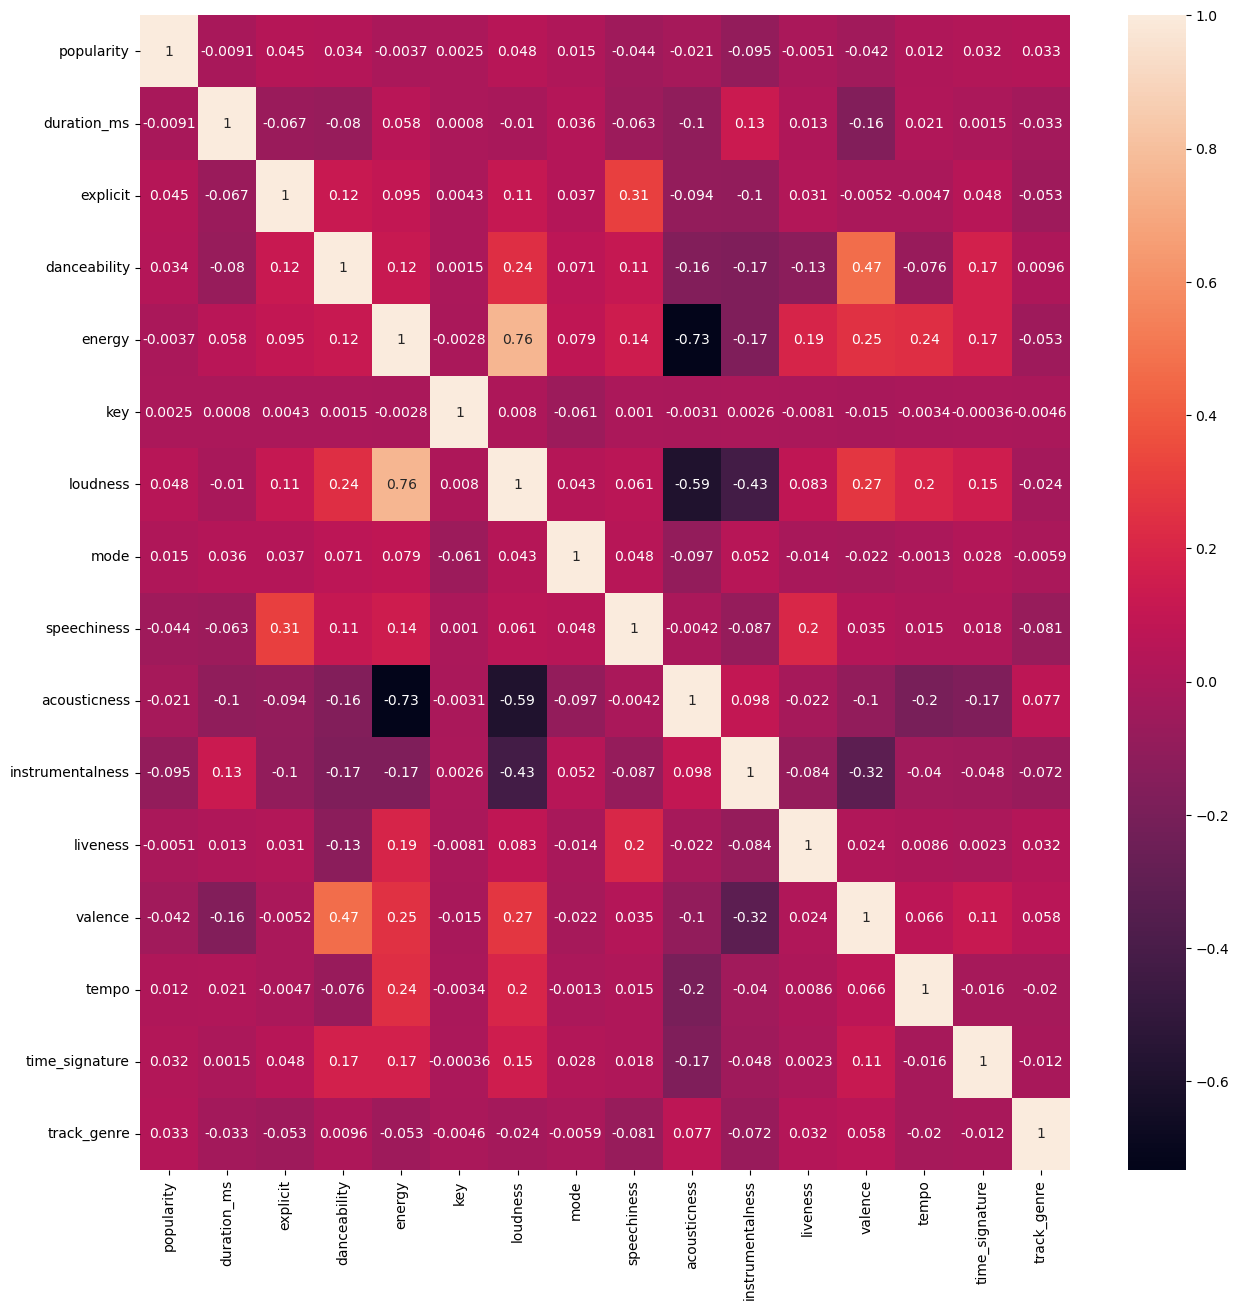

In [39]:
plt.subplots(figsize=(15, 15))
sns.heatmap(full_correlations, annot=True)
plt.show()

Как видим, некоторые категориальные переменные дают большую корреляцию с *popularity*, чем числовые (например, *explicit*)

# Построение моделей линейной регрессии

Удалим малоинформативные идентификаторы и текстовые переменные, а также целевую переменную

In [40]:
X = songs_copy.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity'], axis=1)
X.sample(10)

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
22755,213000,0,0.427,0.949,11,-7.662,1,0.0566,0.000020,0.002430,0.1240,0.146,94.984,1,22
102622,188074,0,0.534,0.441,2,-7.071,0,0.0362,0.525000,0.000000,0.2580,0.113,140.137,1,102
3006,216880,0,0.556,0.864,6,-5.870,1,0.0584,0.009580,0.000000,0.2090,0.400,105.143,1,3
62013,287986,0,0.368,0.327,0,-7.331,0,0.0290,0.406000,0.000000,0.1030,0.210,75.209,1,62
40286,348856,0,0.495,0.403,0,-12.057,0,0.0299,0.124000,0.000000,0.1770,0.318,140.122,1,40
112569,225777,0,0.483,0.490,9,-7.935,0,0.0400,0.819000,0.000109,0.1570,0.247,77.141,1,112
45592,242413,0,0.652,0.435,10,-7.922,0,0.0355,0.818000,0.780000,0.1850,0.252,122.060,1,45
49838,180049,0,0.504,0.988,9,-1.422,0,0.1400,0.099700,0.000426,0.1170,0.466,152.160,1,49
42068,76252,0,0.229,0.931,1,-12.358,1,0.0931,0.000462,0.734000,0.6070,0.589,141.764,0,42
95143,340240,0,0.684,0.596,8,-10.728,1,0.0368,0.388000,0.000055,0.0693,0.919,89.537,1,95


Выделим колонки как массив, что пригодится в дальнейшем

In [41]:
X_columns = X.columns.to_numpy()
X_columns

array(['duration_ms', 'explicit', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre'], dtype=object)

Выделим целевую переменную

In [42]:
y = songs_copy.popularity
y.sample(10)

58502     46
86649     39
51922      0
7095      30
64069      0
103493     0
75907     31
59062      8
113685    37
50204     27
Name: popularity, dtype: int64

## Построение модели с учетом категориальных переменных

Разделим данные на тренировочную и тестовую выборки

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((89936, 15), (22484, 15))

In [44]:
n_components = 7 # для применения PCA-трансформации

Построим обычную линейную регрессию cо стандартизацией

In [45]:
scaled_classic_lr_model = AdvancedLinearRegression(name='lr_scaled', scale=True)
scaled_classic_lr_model.fit(X_train, y_train)
scaled_classic_model_evaluation = evaluate_model(scaled_classic_lr_model, X_test, y_test)
scaled_classic_model_evaluation

{'MSE': 489.9076231987191, 'MAE': 18.458236968510942}

Построим линейную регрессию с PCA и стандартизацией

In [46]:
scaled_pca_lr_model = AdvancedLinearRegression(name='lr_scaled_with_pca', scale=True, use_pca=True, 
                                               n_pca_components=n_components)
scaled_pca_lr_model.fit(X_train, y_train)
scaled_pca_model_evaluation = evaluate_model(scaled_pca_lr_model, X_test, y_test)
scaled_pca_model_evaluation

{'MSE': 501.5425636007828, 'MAE': 18.927548478918343}

Построим график куммулятивного описания дисперсии

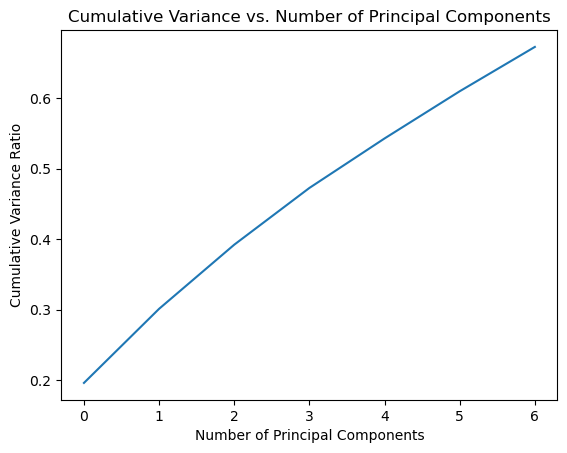

In [47]:
plot_pca_cumulative_variance(scaled_pca_lr_model.pca.explained_variance_ratio_)

Матрица весов главных компонент имеет вид:

In [48]:
report = generate_pca_report(scaled_pca_lr_model.pca, columns=X_columns)
report

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.019902,-0.128238,-0.243353,-0.499713,0.003115,-0.503142,-0.059039,-0.118483,0.433900,0.267476,-0.088573,-0.281672,-0.162928,-0.171094,0.026913
1,0.403448,-0.134230,-0.453229,0.262614,-0.001954,0.087661,0.089529,-0.131788,-0.319422,0.319788,0.101738,-0.449084,0.257201,-0.065550,-0.158073
2,-0.073635,0.532504,-0.132665,0.007540,-0.001366,-0.074011,0.068755,0.651397,0.094627,-0.000535,0.392620,-0.209497,-0.061678,-0.090122,-0.199789
3,0.176215,0.210501,0.356587,-0.046698,-0.092078,-0.102969,0.435387,0.044413,-0.131719,0.345426,-0.429488,-0.063562,-0.235061,0.318398,-0.320762
4,0.094789,-0.139918,-0.019408,0.020703,-0.666536,-0.025831,0.484273,0.014302,0.052286,-0.020998,0.300095,0.049265,-0.111704,0.006789,0.427537
5,0.320024,-0.098807,0.034944,0.041815,0.432868,-0.019278,-0.091562,-0.003848,-0.010660,0.041632,0.377235,-0.044144,-0.494183,0.468499,0.280888
6,-0.014690,0.171988,0.036362,-0.009060,0.528488,0.019824,0.503271,0.033168,-0.032401,0.003893,-0.186057,-0.068736,0.157683,-0.338533,0.504827


Информация о важности переменных в рамках каждой компоненты:

In [49]:
print_pca_components_with_feature_importance(pca=scaled_pca_lr_model.pca, report=report)

Top features for PCA Component 1:
loudness            0.503142
energy              0.499713
acousticness        0.433900
valence             0.281672
instrumentalness    0.267476
danceability        0.243353
time_signature      0.171094
tempo               0.162928
explicit            0.128238
speechiness         0.118483
liveness            0.088573
mode                0.059039
track_genre         0.026913
duration_ms         0.019902
key                 0.003115
Name: 0, dtype: float64

Top features for PCA Component 2:
danceability        0.453229
valence             0.449084
duration_ms         0.403448
instrumentalness    0.319788
acousticness        0.319422
energy              0.262614
tempo               0.257201
track_genre         0.158073
explicit            0.134230
speechiness         0.131788
liveness            0.101738
mode                0.089529
loudness            0.087661
time_signature      0.065550
key                 0.001954
Name: 1, dtype: float64

Top features

Объяснение дисперсии данных компонентами

In [50]:
for i in range(len(scaled_pca_lr_model.pca.explained_variance_ratio_)):
    print(f"PC{i+1} объясняет {scaled_pca_lr_model.pca.explained_variance_ratio_[i]*100:.2f}% дисперсии данных")

PC1 объясняет 19.59% дисперсии данных
PC2 объясняет 10.52% дисперсии данных
PC3 объясняет 9.10% дисперсии данных
PC4 объясняет 8.05% дисперсии данных
PC5 объясняет 7.03% дисперсии данных
PC6 объясняет 6.70% дисперсии данных
PC7 объясняет 6.29% дисперсии данных


## Построение моделей без учета категориальных переменных

In [51]:
X_without_categories = X.drop(categories, axis=1)
X_without_categories.sample(10)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
833,251453,0.602,0.520,-10.831,0.0280,0.73200,0.221000,0.0982,0.523,151.912
61399,196786,0.610,0.953,-4.689,0.0656,0.03060,0.000006,0.1810,0.718,170.086
70619,286826,0.415,0.448,-7.659,0.0303,0.41700,0.000000,0.1060,0.249,119.889
61977,254920,0.301,0.868,-3.598,0.1570,0.11700,0.000117,0.3590,0.474,173.064
7772,142400,0.646,0.427,-12.934,0.0478,0.70200,0.000000,0.2450,0.903,124.182
63610,285761,0.525,0.815,-3.853,0.0791,0.00154,0.000047,0.3620,0.743,141.978
12228,195291,0.436,0.301,-12.831,0.0472,0.69300,0.000005,0.7030,0.280,125.605
66803,154566,0.747,0.720,-5.031,0.0559,0.01920,0.000000,0.0814,0.432,160.034
65257,209648,0.806,0.707,-4.623,0.0307,0.33100,0.000000,0.2940,0.746,118.009
54129,173960,0.669,0.411,-10.575,0.0354,0.02950,0.015800,0.1850,0.708,128.042


In [52]:
X_columns_numeric = X_without_categories.columns.to_numpy()
X_columns_numeric

array(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype=object)

In [53]:
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(X_without_categories, 
                                                                                    y, test_size=0.2, random_state=42)
X_train_numeric.shape, X_test_numeric.shape

((89936, 10), (22484, 10))

Построим обычную линейную регрессию со стандартизацией, но без учета категориальных переменных

In [54]:
scaled_numeric_lr_model = AdvancedLinearRegression(name='lr_scaled_numeric_only', scale=True)
scaled_numeric_lr_model.fit(X_train_numeric, y_train_numeric)
scaled_numeric_model_evaluation = evaluate_model(scaled_numeric_lr_model, X_test_numeric, y_test_numeric)
scaled_numeric_model_evaluation

{'MSE': 491.547055684042, 'MAE': 18.50480341576232}

Построим линейную регрессию с PCA и стандартизацией, но без учета категориальных переменных

In [55]:
scaled_numeric_pca_lr_model = AdvancedLinearRegression(name='lr_scaled_numeric_only_with_pca', scale=True, use_pca=True, 
                                                       n_pca_components=n_components)
scaled_numeric_pca_lr_model.fit(X_train_numeric, y_train_numeric)
scaled_numeric_pca_model_evaluation = evaluate_model(scaled_numeric_pca_lr_model, X_test_numeric, y_test_numeric)
scaled_numeric_pca_model_evaluation

{'MSE': 497.25035580857497, 'MAE': 18.777664116705214}

Построим график куммулятивного описания дисперсии

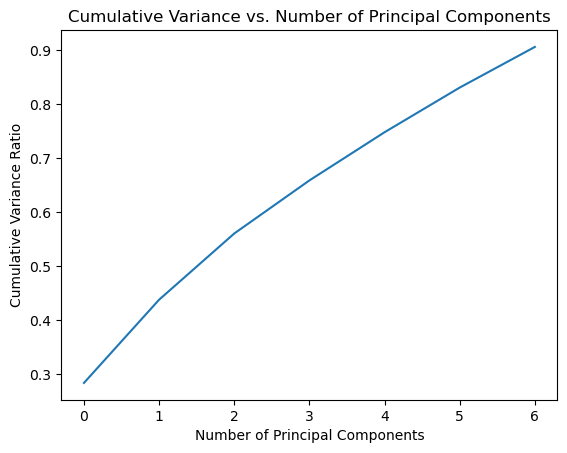

In [56]:
plot_pca_cumulative_variance(scaled_numeric_pca_lr_model.pca.explained_variance_ratio_)

Матрица весов главных компонент имеет вид:

In [57]:
numeric_pca_report = generate_pca_report(scaled_numeric_pca_lr_model.pca, columns=X_columns_numeric)
numeric_pca_report

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.017739,-0.235294,-0.513699,-0.519482,-0.101947,0.442859,0.278924,-0.093583,-0.292631,-0.178514
1,0.407679,-0.489131,0.254824,0.073427,-0.093595,-0.304347,0.317991,0.143599,-0.485950,0.254850
2,0.168015,0.225905,-0.027621,0.041394,-0.604676,-0.192033,0.166015,-0.693078,0.072513,0.050747
3,0.550022,0.388489,0.066566,-0.041698,0.280624,-0.125330,0.263395,0.062499,-0.005850,-0.610416
4,-0.103347,0.263315,0.008783,-0.181830,0.549938,-0.038055,0.481762,-0.259315,0.059478,0.529234
5,0.668192,0.083368,-0.180177,-0.105057,-0.081648,0.274181,-0.259823,0.191256,0.334424,0.453101
6,0.194144,-0.124013,-0.103399,0.153183,0.430306,0.049838,-0.537692,-0.539476,-0.380139,-0.021748


Информация о важности переменных в рамках каждой компоненты:

In [58]:
print_pca_components_with_feature_importance(pca=scaled_numeric_pca_lr_model.pca, report=numeric_pca_report)

Top features for PCA Component 1:
loudness            0.519482
energy              0.513699
acousticness        0.442859
valence             0.292631
instrumentalness    0.278924
danceability        0.235294
tempo               0.178514
speechiness         0.101947
liveness            0.093583
duration_ms         0.017739
Name: 0, dtype: float64

Top features for PCA Component 2:
danceability        0.489131
valence             0.485950
duration_ms         0.407679
instrumentalness    0.317991
acousticness        0.304347
tempo               0.254850
energy              0.254824
liveness            0.143599
speechiness         0.093595
loudness            0.073427
Name: 1, dtype: float64

Top features for PCA Component 3:
liveness            0.693078
speechiness         0.604676
danceability        0.225905
acousticness        0.192033
duration_ms         0.168015
instrumentalness    0.166015
valence             0.072513
tempo               0.050747
loudness            0.041394
energy 

Объяснение дисперсии данных компонентами

In [59]:
for i in range(len(scaled_pca_lr_model.pca.explained_variance_ratio_)):
    print(f"PC{i+1} объясняет {scaled_pca_lr_model.pca.explained_variance_ratio_[i]*100:.2f}% дисперсии данных")

PC1 объясняет 19.59% дисперсии данных
PC2 объясняет 10.52% дисперсии данных
PC3 объясняет 9.10% дисперсии данных
PC4 объясняет 8.05% дисперсии данных
PC5 объясняет 7.03% дисперсии данных
PC6 объясняет 6.70% дисперсии данных
PC7 объясняет 6.29% дисперсии данных


In [60]:
all_models = [
    scaled_classic_lr_model.name,
    scaled_pca_lr_model.name,
    scaled_numeric_lr_model.name,
    scaled_numeric_pca_lr_model.name
]
all_models

['lr_scaled',
 'lr_scaled_with_pca',
 'lr_scaled_numeric_only',
 'lr_scaled_numeric_only_with_pca']

In [61]:
all_evaluations = [
    scaled_classic_model_evaluation,
    scaled_pca_model_evaluation,
    scaled_numeric_model_evaluation,
    scaled_numeric_pca_model_evaluation
]

all_evaluations

[{'MSE': 489.9076231987191, 'MAE': 18.458236968510942},
 {'MSE': 501.5425636007828, 'MAE': 18.927548478918343},
 {'MSE': 491.547055684042, 'MAE': 18.50480341576232},
 {'MSE': 497.25035580857497, 'MAE': 18.777664116705214}]

In [62]:
models_report = pd.DataFrame(all_evaluations, index=all_models)
models_report

,MSE,MAE
lr_scaled,489.907623,18.458237
lr_scaled_with_pca,501.542564,18.927548
lr_scaled_numeric_only,491.547056,18.504803
lr_scaled_numeric_only_with_pca,497.250356,18.777664
